In [34]:
import pandas as pd
from scipy.stats import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyspark.sql.types import IntegerType, FloatType ,DateType
from pyspark.sql import SparkSession
import findspark
import pyspark.sql.functions as F
from pyspark.sql.functions import *
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import numpy as np

In [5]:
findspark.init()
findspark.find()

'C:\\Spark\\spark-3.0.3-bin-hadoop2.7'

In [6]:
spark = SparkSession \
    .builder \
    .appName("Hypothesis ") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Read data

In [156]:
df = spark.read.csv(".\data\practive pyspark.csv", header =True)
df.printSchema()

root
 |-- Code: string (nullable = true)
 |-- area: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: string (nullable = true)
 |-- age_group: string (nullable = true)
 |-- year_of_school: string (nullable = true)
 |-- degree: string (nullable = true)
 |-- job: string (nullable = true)
 |-- know_english: string (nullable = true)
 |-- know_france: string (nullable = true)
 |-- know_chinese: string (nullable = true)
 |-- income: string (nullable = true)
 |-- booking_date: string (nullable = true)
 |-- flight_date: string (nullable = true)
 |-- flight_status: string (nullable = true)
 |-- professionally_staff: string (nullable = true)
 |-- customer_service : string (nullable = true)
 |-- diversity_product: string (nullable = true)
 |-- good_price: string (nullable = true)
 |-- easily_transaction: string (nullable = true)
 |-- goodlooking_staff: string (nullable = true)
 |-- diversity_flighttime: string (nullable = true)
 |-- good_construction: string (nullable = tru

# preprocessing data

In [157]:
#Convering str to numberic
df = df.withColumn('Code', F.col('Code').cast(IntegerType()))\
        .withColumn('age', F.col('age').cast(IntegerType()))\
        .withColumn('year_of_school',F.col('year_of_school').cast(IntegerType()))\
        .withColumn('know_english', F.col('know_english').cast(IntegerType()))\
        .withColumn('know_france', F.col('know_france').cast(IntegerType()))\
        .withColumn('know_chinese', F.col('know_chinese').cast(IntegerType()))\
        .withColumn('income', F.col('income').cast(IntegerType()))\
        .withColumn('flight_status', F.col('flight_status').cast(IntegerType()))\
        .withColumn('professionally_staff', F.col('professionally_staff').cast(IntegerType()))\
        .withColumn('customer_service ', F.col('customer_service ').cast(IntegerType()))\
        .withColumn('diversity_product', F.col('diversity_product').cast(IntegerType()))\
        .withColumn('good_price', F.col('good_price').cast(IntegerType()))\
        .withColumn('easily_transaction', F.col('easily_transaction').cast(IntegerType()))\
        .withColumn('goodlooking_staff', F.col('goodlooking_staff').cast(IntegerType()))\
        .withColumn('diversity_flighttime', F.col('diversity_flighttime').cast(IntegerType()))\
        .withColumn('good_construction', F.col('good_construction').cast(IntegerType()))
df.printSchema()

root
 |-- Code: integer (nullable = true)
 |-- area: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- age_group: string (nullable = true)
 |-- year_of_school: integer (nullable = true)
 |-- degree: string (nullable = true)
 |-- job: string (nullable = true)
 |-- know_english: integer (nullable = true)
 |-- know_france: integer (nullable = true)
 |-- know_chinese: integer (nullable = true)
 |-- income: integer (nullable = true)
 |-- booking_date: string (nullable = true)
 |-- flight_date: string (nullable = true)
 |-- flight_status: integer (nullable = true)
 |-- professionally_staff: integer (nullable = true)
 |-- customer_service : integer (nullable = true)
 |-- diversity_product: integer (nullable = true)
 |-- good_price: integer (nullable = true)
 |-- easily_transaction: integer (nullable = true)
 |-- goodlooking_staff: integer (nullable = true)
 |-- diversity_flighttime: integer (nullable = true)
 |-- good_construction: integer

In [158]:
data = df.toPandas()

# 1. Giả sử thu nhập của kh có độ lệch chuẩn là 5000, với alpha=0.05, có thể kết luận thu nhập trung bình của kh là 14000 hay không?


- H0 : mu # 14000
- H1 : mu = 14000

In [134]:
z_score = (-14000+data.income.mean())/(5000/np.sqrt(len(data.income)))
z_score

-0.6277984453628374

p_value = 1-0.4480 = 0.552> 0.05 . Vậy Fail to reject H0. 
-  95% thu nhập  trung bình  # 14000

# Có kết luận cho rằng thu nhập trung bình của nam cao hơn nữ 5000, đúng hay sai? biết aplpha = 0.05, độ lệch chuẩn thu nhập của nam và nữ lần lượt là 7000 và 5000.

Hypotheses

- mu1 : Thu nhập trung bình của nam
- mu2 : Thu nhập trung bình của nữ
- H0 : mu1 - mu2 =< 0
- H1 : m1 - mu2 > 0

test statistic

In [111]:
n2 = len(data[data.gender == 'female'])
n1 = len(data[data.gender == 'male'])
mean_1 = data[data.gender == 'male']['income'].mean()
mean_2  =data[data.gender == 'female']['income'].mean()
mu1_square = 7000*7000
mu2_square = 5000*5000

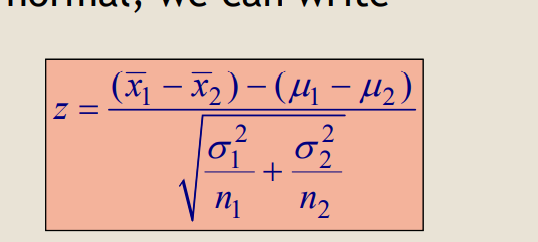

In [114]:
z_score = (mean_1-mean_2)/np.sqrt((mu1_square/n1)+(mu2_square/n2))
z_score

11.858532354212112

z_0.05 = 1.645 < z_sccore . Do not reject H0. Vậy không đủ bằng chứng để kết luận thu nhập của nam cao hơn của nữ

# với alpha = 0.05, trung bình thu nhập của kh là 13000 đúng hay sai? (chưa biết phương sai)

In [133]:
import statistics
standard_deviation = statistics.stdev(data.income)
standard_deviation

7144.298795694671

- H0: mu # 13000
- H1: mu1 = 13000

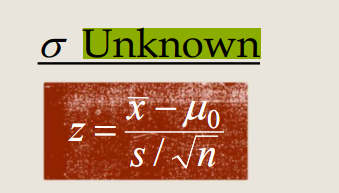

In [136]:
z_score = (13000 -  data.income.mean())/(standard_deviation/np.sqrt(500))
z_score

-2.6904932307376574

p_value = 0.07 > 0.05. Do not reject H0. 

# với alpha = 0.05, thu nhập tb của kh nam bằng thu nhập tb của kh nữ đúng hay sai? (chưa biết phương sai)

In [131]:
standard_deviation_male = statistics.stdev(data[data.gender == 'male']['income'])
standard_deviation_female = statistics.stdev(data[data.gender == 'male']['income'])

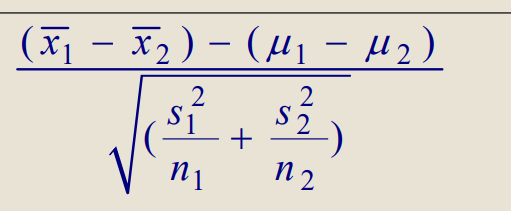

- Ho : mu1 # mu2
- H1: mu1 = mu2

In [126]:
z_score = (mean_1-mean_2)/np.sqrt(((standard_deviation_male**2)/n1)+((standard_deviation_female**2)/n2))
z_score

8.709406746571693

z_0.025 = 1.96 < z_sccore . Do not reject H0. Vậy không đủ bằng chứng để kết luận thu nhập của nam bằng thu nhập của nữ

# Liệu có mối quan hệ giữa 2 biến age_group và degree hay không? kiểm định điều đó

In [159]:
data['degree'] = data['degree'].map({'master':3,'highshool':1,'bachelor':2})
data['age_group'] = data['age_group'].map({'elder':3,'youth':1,'middle':2})

In [161]:
data.head()

,Code,area,gender,age,age_group,year_of_school,degree,job,know_english,know_france,...,flight_date,flight_status,professionally_staff,customer_service,diversity_product,good_price,easily_transaction,goodlooking_staff,diversity_flighttime,good_construction
0,1,central,female,69,2,16,3,manager,1,1,...,01/05/2013,1,2,2,1,1,2,2,1,1
1,2,southern,female,50,2,12,1,officer,0,0,...,01/05/2013,1,3,3,3,2,3,3,2,3
2,3,northern,male,73,3,12,1,officer,1,0,...,01/05/2013,1,2,2,1,2,3,5,1,1
3,4,northern,female,73,3,12,1,officer,0,0,...,01/05/2013,1,5,3,2,4,5,3,2,2
4,5,central,male,69,2,16,3,officer,1,0,...,01/05/2013,0,3,3,3,3,3,3,3,3


- H0: Không tương quan
- H1: Tương quan

In [164]:
coef, p = spearmanr(data.age_group, data.degree)

In [165]:
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Không tươgn quan (fail to reject H0) p=%.3f' % p)
else:
    print('tương quan (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.148
tương quan (reject H0) p=0.001


Vậy hai biến có mối quan hệ với nhau

# Số kh làm officer bằng số kh làm sale và gấp 5 lần số kh làm manager đúng hay sai?

- Ho: officer = sale = 5 manager
- H1: Không bằng

# Kiểm định phân phối của biến age xem có đúng là pp chuẩn hay ko?

In [183]:
H0=  'Không tuân theo phân phôi chuẩn'
H1= 'Tuân theo Phân phối chuẩn'

In [188]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(data.age)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print(H0)
else:
    print(H1)

stat=0.867, p=0.000
Tuân theo Phân phối chuẩn
